<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [26]:
# Execute before importing KMeans 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [27]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 1. Import the data

In [77]:
# Load dataset
csv_file = '../../DATA/ais.csv'
ais = pd.read_csv(csv_file, index_col='Unnamed: 0')

In [4]:
ais.shape

(202, 13)

In [33]:
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [34]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


In [35]:
ais.describe().T

,count,mean,std,min,25%,50%,75%,max
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
ht,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40


In [36]:
ais.isna().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

### 2. Do some EDA of relationships between features.

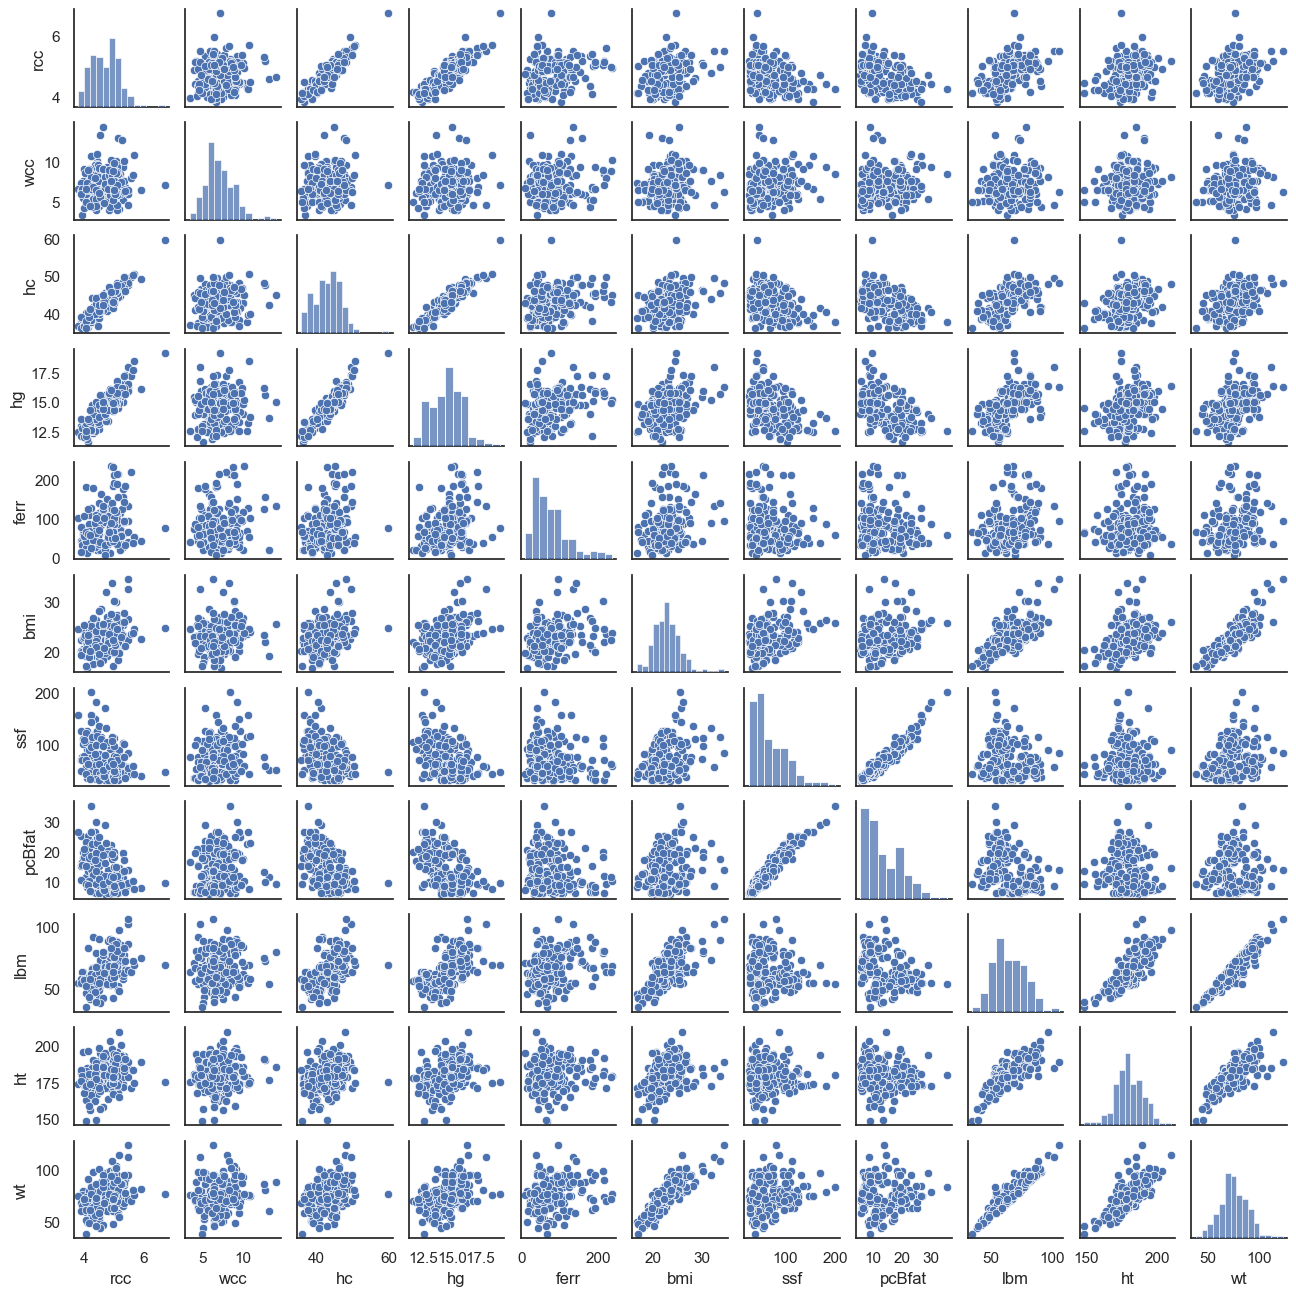

In [37]:
# Plot pairwise relationships
sns.pairplot(ais, height=1.2);

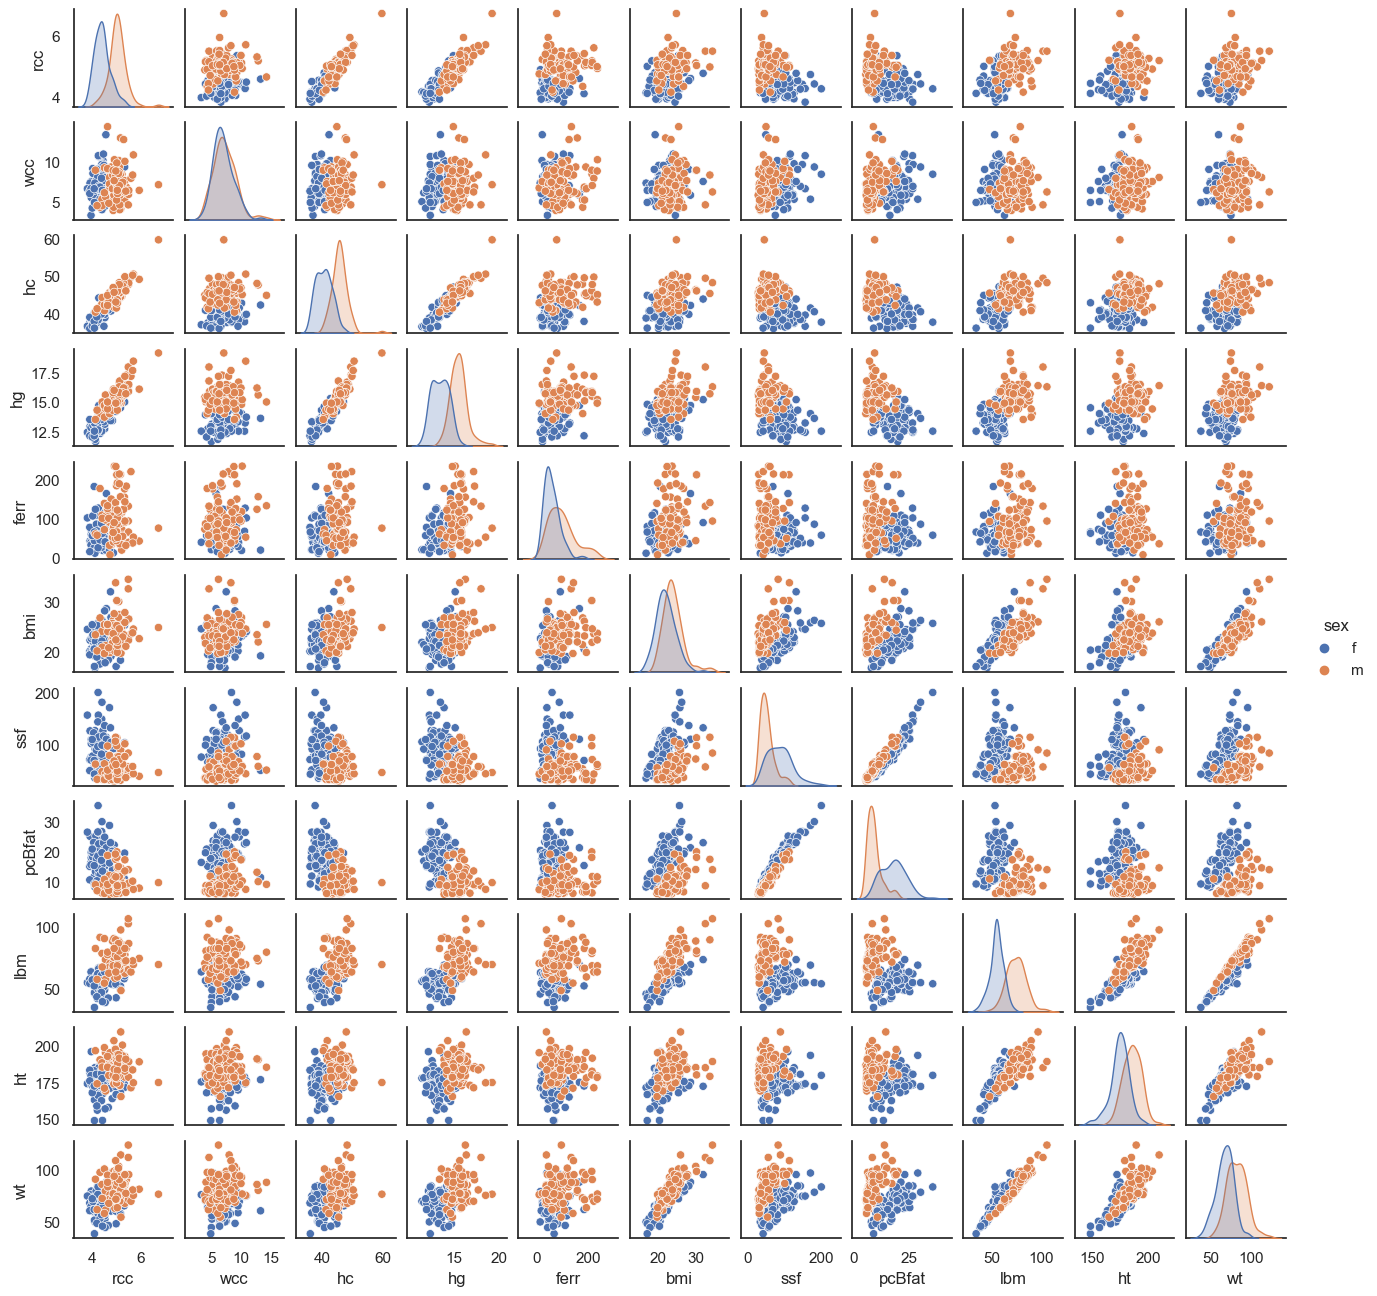

In [38]:
# Plot pairwise relationships
sns.pairplot(ais, hue='sex', height=1.2);

In [39]:
# Get counts of unique values for sex
ais['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

In [40]:
# Get counts of unique values for sport
ais['sport'].value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

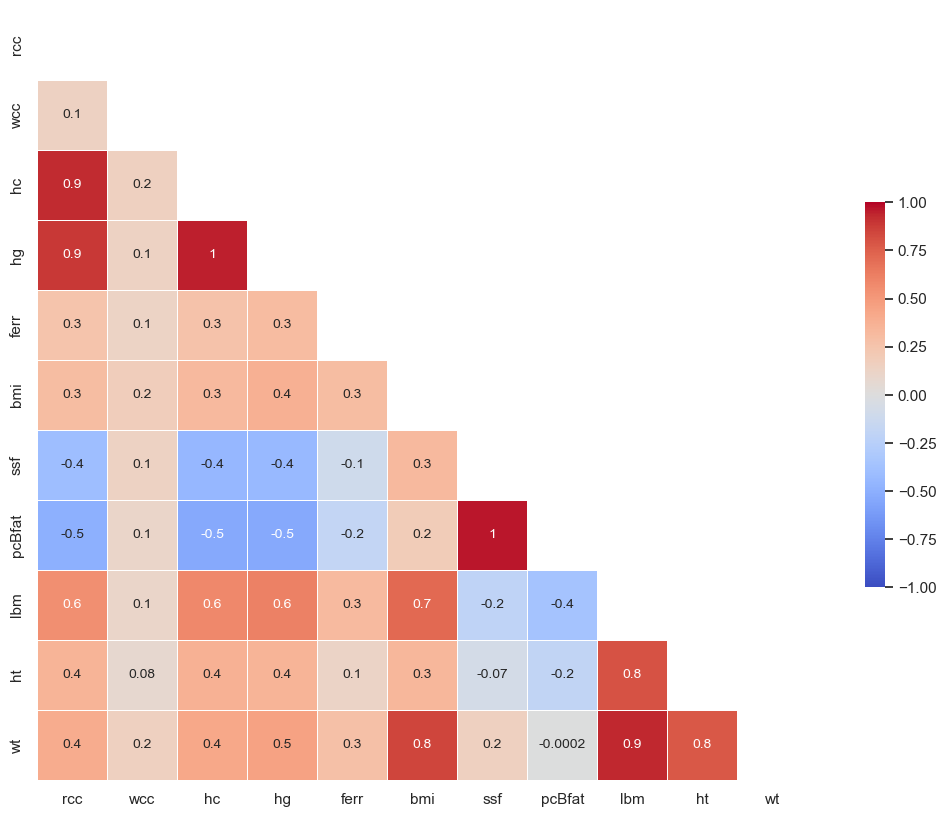

In [41]:
# Correlation heatmap
sns.set_theme(style="white")
plt.figure(figsize=(15,10))

# Generate mask for upper triangle
mask = np.zeros_like(ais.corr(), dtype=bool) #generate mask of "0's"
mask[np.triu_indices_from(mask)] = True #return upper triangle
# Set diverging colormap
cmap = sns.color_palette('coolwarm', as_cmap=True)
# Draw heatmap with mask and correct aspect ratio
sns.heatmap(ais.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, fmt='.1g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 10}, annot=True);

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [17]:
# ANSWER
# Drop columns sex and sport
X = ais.drop(['sex', 'sport'], axis=1)
X.head(3)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1


In [6]:
# Standardize data (by removing the mean and scaling to unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.shape

(202, 11)

In [8]:
X_scaled

array([[-1.66056304,  0.21777075, -1.53030101, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-0.67553837,  0.66323597, -1.33872548, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.26655317, -1.17430808, -1.83134828, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 0.68160673, -0.39474394, -0.10716849, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 0.55027011,  0.94165174, -0.02506469, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.44773703, -0.45042709,  0.7959733 , ...,  0.54658641,
         1.10150699,  0.12181392]])

In [9]:
# First 10 rows of first feature
X_scaled[:10, 0]

array([-1.66056304, -0.67553837, -1.26655317, -1.33222148, -0.58798062,
       -1.35411092, -0.89443274, -0.65364893, -0.91632218, -0.456644  ])

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [10]:
# ANSWER
# K-Means w/ 2 clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(X_scaled)

# K-Means w/ 4 clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(X_scaled)

KMeans(n_clusters=4)

In [46]:
# Coordinates of cluster centers
k_mean4.cluster_centers_

array([[-0.8570217 , -0.04849597, -0.91576651, -0.88360258, -0.39338309,
         0.10664052,  1.22374084,  1.30408091, -0.53993222, -0.19307911,
        -0.0840794 ],
       [ 0.83359376, -0.19197321,  0.80991546,  0.79804782,  0.0643323 ,
        -0.18837463, -0.79849352, -0.91008594,  0.29974257,  0.24947091,
        -0.02284658],
       [-0.54991204, -0.21074743, -0.51471271, -0.59105878, -0.38001976,
        -1.02173718, -0.40306825, -0.16256092, -1.08378937, -1.04456283,
        -1.2183081 ],
       [ 0.58857662,  0.469505  ,  0.6483005 ,  0.69771482,  0.74390348,
         1.06496953, -0.13425937, -0.33358526,  1.32633806,  0.9468184 ,
         1.28911268]])

* 4 clusters, the cluster centers (= centroids) are the means of all points within a cluster, here the centroids are 11-dimensional (11 coordinates for each point)

In [12]:
# Labels of each point
k_mean4.labels_

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 0, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       1, 1, 1, 1])

In [47]:
# Inertia (within-cluster sum-of-squares criterion)
print('Inertia for K-Means w/ 2 clusters:', k_mean2.inertia_)
print('Inertia for K-Means w/ 4 clusters:', k_mean4.inertia_)

Inertia for K-Means w/ 2 clusters: 1432.8802984104345
Inertia for K-Means w/ 4 clusters: 1048.4581899632524


### 5. Get the labels for the models

In [14]:
# ANSWER
# Labels for 2 cluster model
labels_2 = k_mean2.labels_

# Labels for 4 cluster model
labels_4 = k_mean4.labels_

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the **inertia attribute** to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [18]:
# ANSWER
# Range of k clusters
clusters = range(1, 15)

# List of sums of squared distances of samples to their closest cluster center
sum_of_squared_distances = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)

In [19]:
sum_of_squared_distances

[2221.999999999999,
 1432.8802984104345,
 1207.3413801466002,
 1048.7336624388095,
 973.1395258913954,
 909.5725337579178,
 845.6798381918022,
 794.4738479250553,
 761.6220536957788,
 711.3871388779356,
 682.7221018959924,
 644.7629889699831,
 625.9031154430198,
 609.3984717955503]

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

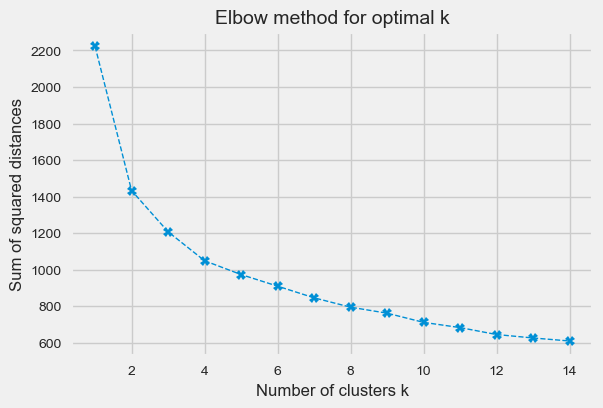

In [44]:
# ANSWER
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
plt.plot(clusters, sum_of_squared_distances, marker='X', linestyle='--', linewidth=1)
plt.xlabel('Number of clusters k', fontsize=12)
plt.ylabel('Sum of squared distances', fontsize=12)
plt.title('Elbow method for optimal k', fontsize=14);

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

In [78]:
# Make a copy of ais for label comparison
ais_labels = ais.copy()
ais_labels.head(3)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball


In [79]:
# Add labels for both cluster models
ais_labels['labels_2'] = labels_2
ais_labels['labels_4'] = labels_4
ais_labels.head(3)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport,labels_2,labels_4
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball,0,0
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball,0,0
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball,0,0


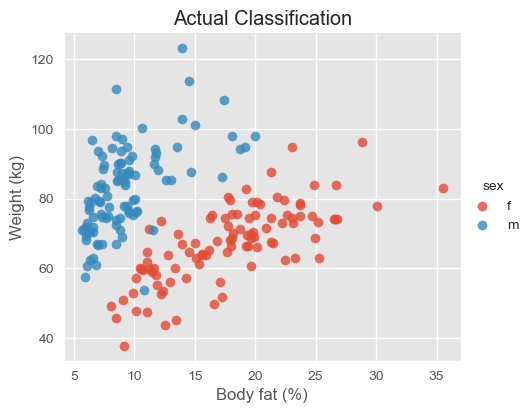

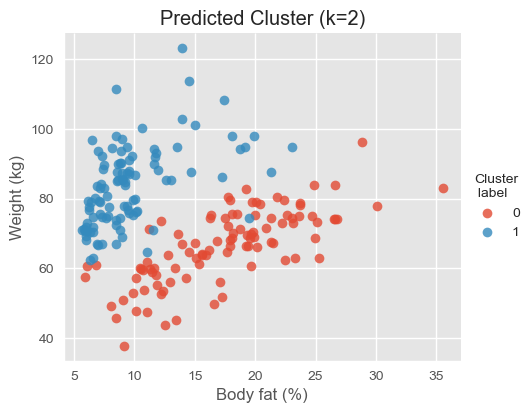

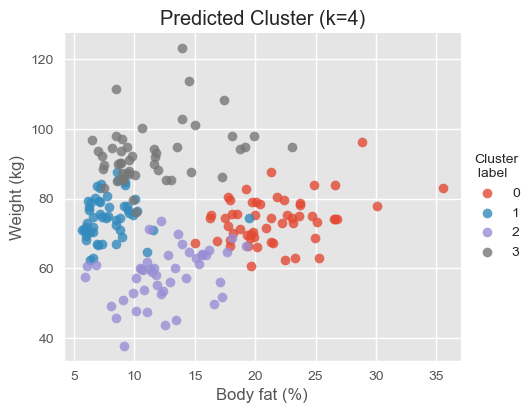

In [94]:
# ANSWER
plt.style.use('ggplot')

# Plot actual classification of male and female
ax1 = sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', hue_order=['f','m'], height=4, aspect=1.2, fit_reg=False)
ax1.set(title='Actual Classification', xlabel='Body fat (%)', ylabel='Weight (kg)');

# Plot predicted cluster for k=2
ax2 = sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels_2', height=4, aspect=1.2, fit_reg=False)
ax2.set(title='Predicted Cluster (k=2)', xlabel='Body fat (%)', ylabel='Weight (kg)')
ax2._legend.set_title('Cluster\n label');

# Plot predicted cluster for k=4
ax3 = sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels_4', height=4, aspect=1.2, fit_reg=False)
ax3.set(title='Predicted Cluster (k=4)', xlabel='Body fat (%)', ylabel='Weight (kg)')
ax3._legend.set_title('Cluster\n label');



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



